In [15]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
import numpy as np
from numpy.polynomial.polynomial import polyfit

In [16]:
finances = pd.read_pickle('IPL_finances.pkl')
results  = pd.read_pickle('IPL_results.pkl')

#Assume that the current 60crore rupees budget applied forever (rules for 2013 are not clear to me)
finances['Spend']=600000000.0-finances['Balance']
finances['Spend_crores']=finances['Spend']/10000000.0


In [3]:
#Get all teams ever for which we have both results and finance data
teams_results = set(results.index.values)
teams_finances= set(finances.index.get_level_values(level=1))
#Final set of teams with both data
teams = teams_results.intersection(teams_finances)
print(teams)

{'Kings XI Punjab', 'Mumbai Indians', 'Delhi Capitals', 'Sunrisers Hyderabad', 'Royal Challengers Bangalore', 'Rajasthan Royals', 'Kolkata Knight Riders', 'Rising Pune Supergiant', 'Pune Warriors India', 'Gujarat Lions', 'Chennai Super Kings'}


In [4]:
#Currently Active Teams based on results for latest year
currently_active = results.iloc[:,-1].notnull()
currently_active_teams = results[currently_active].index.to_list()
print(currently_active_teams)

['Chennai Super Kings', 'Delhi Capitals', 'Kings XI Punjab', 'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad']


In [5]:
#Total money spent ever in IPL (in crores)
sum(finances.Spend_crores)

3454.1495342

In [13]:
#Money spent by teams since 2013
finances.Spend_crores.groupby(level=[0]).sum()

year
2013    389.964534
2014    468.100000
2015    432.645000
2016    417.720000
2017    422.820000
2018    468.700000
2019    441.550000
2020    412.650000
Name: Spend_crores, dtype: float64

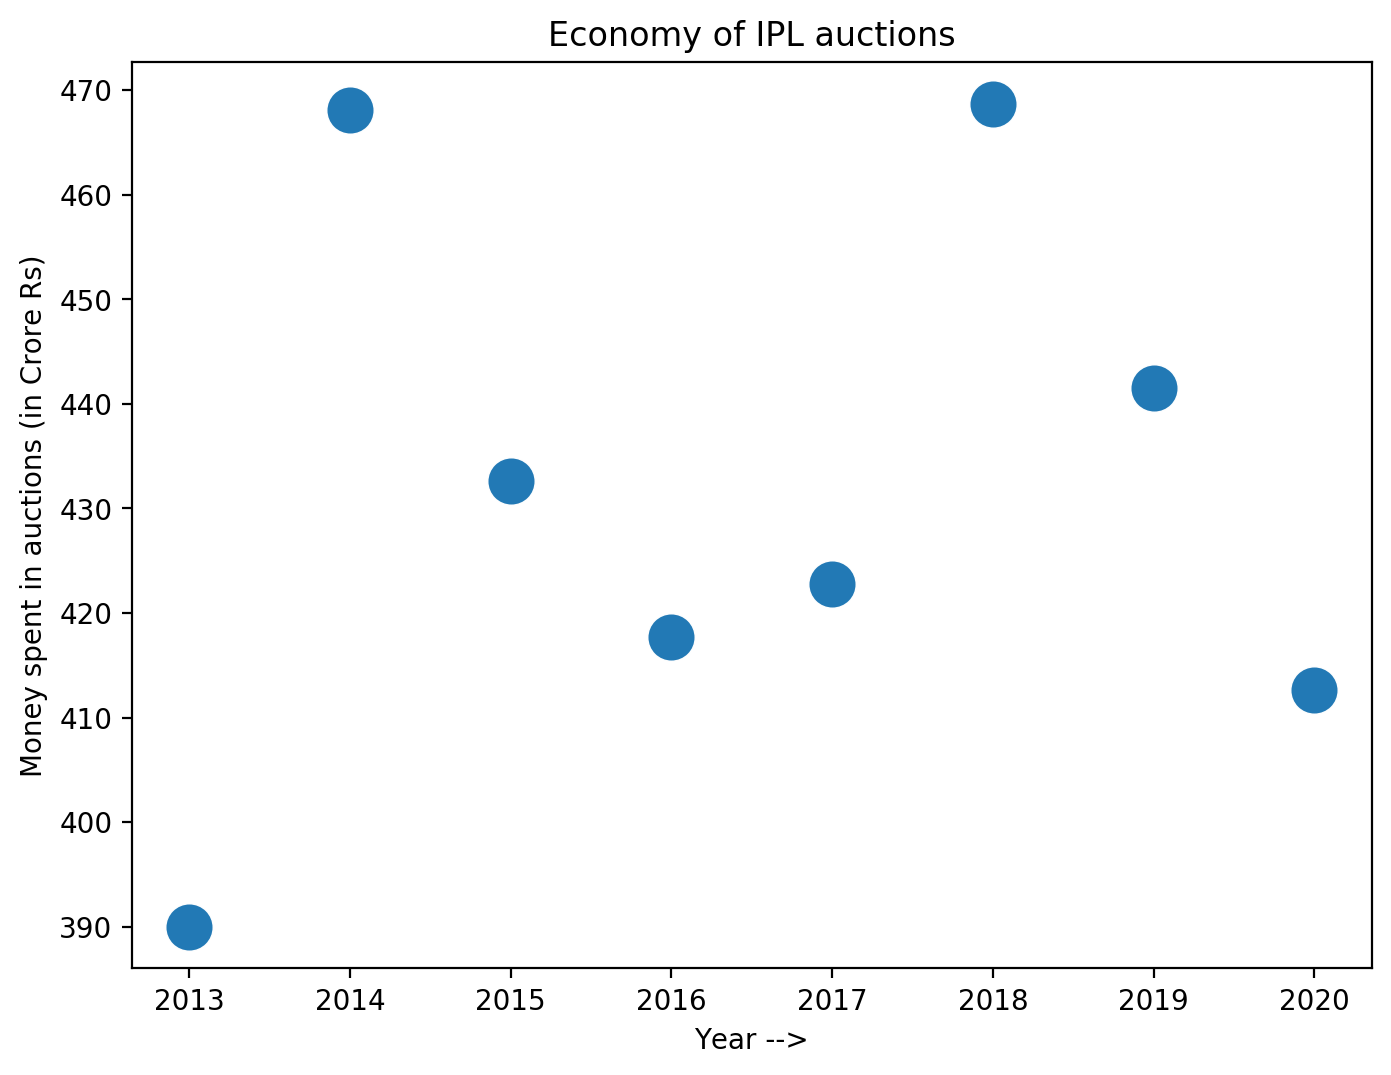

In [25]:
sum_spend = finances.Spend_crores.groupby(level=[0]).sum()
figure(num=None, figsize=(8, 6), dpi=200, facecolor='w', edgecolor='k')
sns.scatterplot(alpha=0.99, s=300, data=sum_spend,legend=False)
plt.ylabel("Money spent in auctions (in Crore Rs)")
plt.xlabel("Year -->")
plt.title("Economy of IPL auctions") 
plt.savefig('Res3.png')

In [7]:
#Money spent by teams since 2013
finances.Spend_crores.groupby(level=[1]).sum()

Team
Chennai Super Kings            337.988869
Delhi Capitals                 441.148534
Gujarat Lions                   99.150000
Kings XI Punjab                383.005761
Kolkata Knight Riders          428.396954
Mumbai Indians                 462.150392
Pune Warriors India             55.094807
Rajasthan Royals               277.115046
Rising Pune Supergiant         114.500000
Royal Challengers Bangalore    456.709716
Sunrisers Hyderabad            398.889454
Name: Spend_crores, dtype: float64

In [8]:
def get_games_point(results,team = 'Delhi Capitals',year=2019):
    try:
        res  = results[year].loc[team][0]
        wins   = res[0]
        losses = res[1]
        ties   = res[2]
        nr     = res[3]
        games  = wins+losses+ties+nr
        point = 2*wins+1*(ties+nr)
    except TypeError:
        point = 0.0
        games  = 0
    return(games, point)


In [9]:
points = {}
for year in range(2013,2020):
    for team in teams:
        games,point = get_games_point(results,team=team,year=year)
        points[(year,team)] = [int(games),int(point)]

In [10]:
points = pd.DataFrame.from_dict(points)
points = points.transpose()
points.columns = ['games','points']
points['ppg']=points.points/points.games
points = points.fillna(0)
points.index.set_names(['year', 'Team'], inplace=True)

In [11]:
data1 = points.join(finances)
data1['Spend_crores']= data1['Spend_crores'].fillna(0)
data = data1.drop(columns=['Balance','Overseas','TotalPlayers','Spend'])

In [12]:
data.to_pickle('IPL_results.pkl')

In [27]:
data['point_per_crore']=data['points']/data['Spend_crores']

In [29]:
data.to_csv('test.csv')